In [15]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')
df

Year Country_ISO_3_code      Country             WHO_region  \
0      1950                AFG  Afghanistan  Eastern Mediterranean   
1      1951                AFG  Afghanistan  Eastern Mediterranean   
2      1952                AFG  Afghanistan  Eastern Mediterranean   
3      1953                AFG  Afghanistan  Eastern Mediterranean   
4      1954                AFG  Afghanistan  Eastern Mediterranean   
...     ...                ...          ...                    ...   
23932  2046                ZWE     Zimbabwe                 Africa   
23933  2047                ZWE     Zimbabwe                 Africa   
23934  2048                ZWE     Zimbabwe                 Africa   
23935  2049                ZWE     Zimbabwe                 Africa   
23936  2050                ZWE     Zimbabwe                 Africa   

      World_bank_income_group  Adolescent_population_in_millions  \
0                  Low income                                1.7   
1                  Low income                                1.7   
2                  Low income                                1.7   
3                  Low income                                1.8   
4                  Low income                                1.8   
...                       ...                                ...   
23932     Lower middle income                                5.0   
23933     Lower middle income                                5.1   
23934     Lower middle income                                5.1   
23935     Lower middle income                                5.2   
23936     Lower middle income                                5.2   

      change_from_previous_year_in_percent  
0                                   #WERT!  
1                                      1.5  
2                                      1.5  
3                                      1.6  
4                                      1.7  
...                                    ...  
23932                                  1.3  
23933                                  1.2  
23934                                  1.1  
23935                                  1.0  
23936                                  0.9  

[23937 rows x 7 columns]

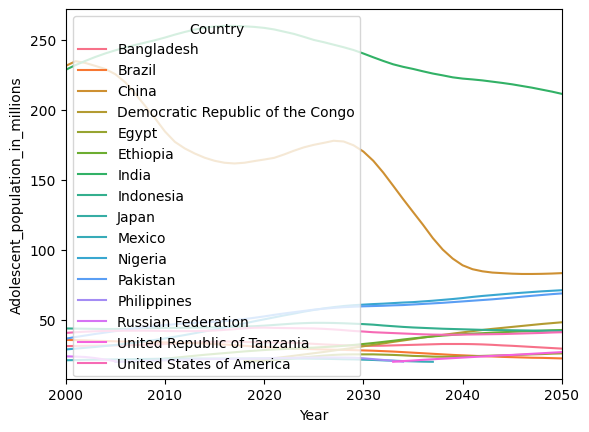

In [16]:
# Filter the DataFrame for Adolescent population in millions >= 20
df_filtered = df[df['Adolescent_population_in_millions'] >= 20]

# Create the line plot with the filtered DataFrame
sns.lineplot(data=df_filtered, x='Year', y='Adolescent_population_in_millions', hue='Country')

plt.xlim((2000, 2050))
plt.show()

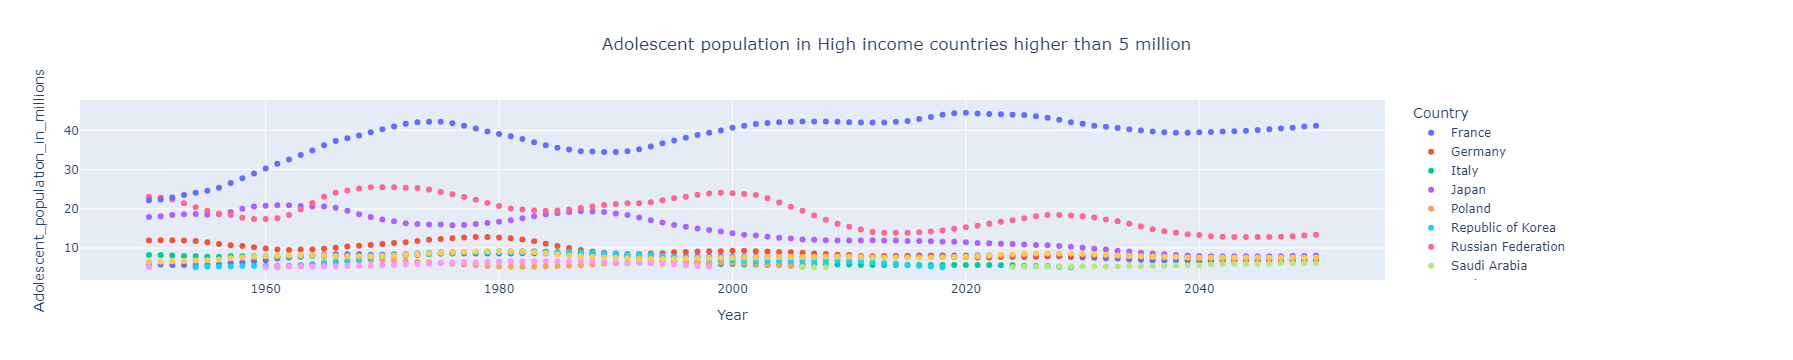

In [20]:
#Adolescent population in High income countries higher than 5 million
# Visual Python: Visualization > Plotly
df_visualization_plotly = df[(df['World_bank_income_group'] == 'High income') & 
    (df['Adolescent_population_in_millions'] > 5)]
fig = px.scatter(df_visualization_plotly, x='Year', y='Adolescent_population_in_millions', color='Country', 
                 title = "Adolescent population in High income countries higher than 5 million")

fig.update_layout(title_x=0.5)

fig.show()

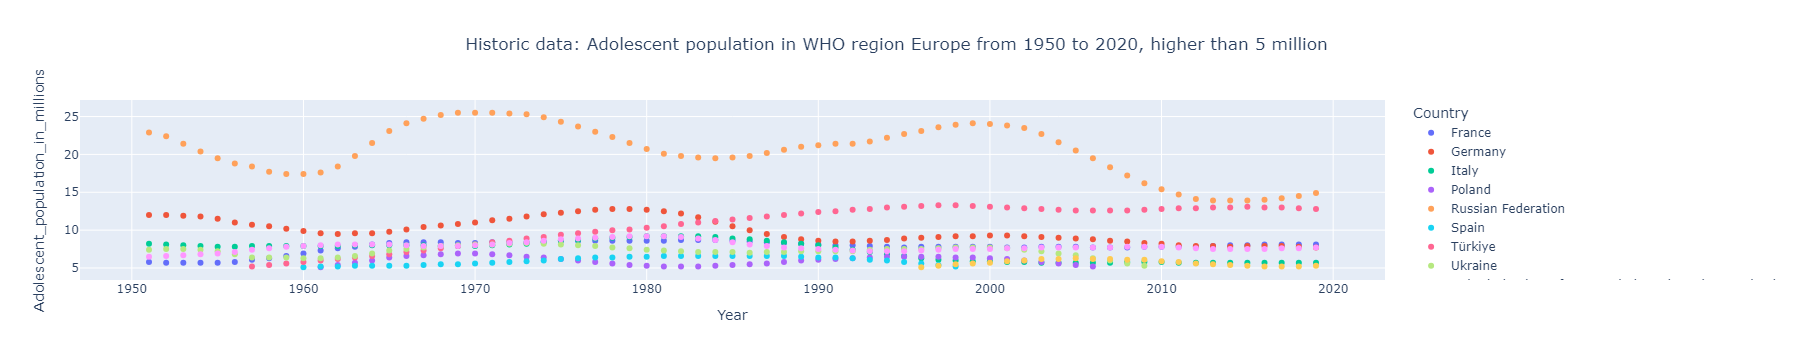

In [21]:
#Historic data: Adolescent population in WHO region Europe from 1950 to 2020, higher than 5 million
# Visual Python: Visualization > Plotly
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country')

# Filter the DataFrame for High income
df_filtered = df[(df['WHO_region'] == 'Europe') 
    & (df['Adolescent_population_in_millions'] > 5)
    & (df.Year > 1950) & (df.Year < 2020)]

# Create the scatter plot with the filtered DataFrame
fig = px.scatter(df_filtered, x='Year', y='Adolescent_population_in_millions', color='Country', 
                 title="Historic data: Adolescent population in WHO region Europe from 1950 to 2020, higher than 5 million")

fig.update_layout(title_x=0.5)

fig.show()

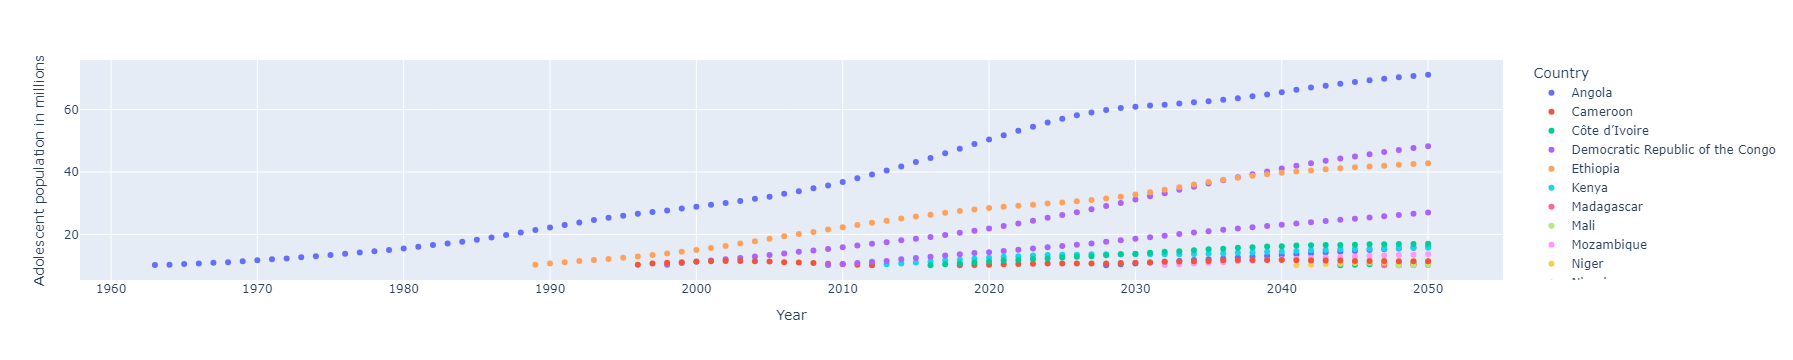

In [82]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Visual Python: Visualization > Plotly
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country')

# Filter the DataFrame for > 2 Million adolescents and WHO region == Europe
df_filtered = df[(df['Adolescent_population_in_millions'] > 10) & (df['WHO_region'] == 'Africa')]

# Create the scatter plot with the filtered DataFrame
fig = px.scatter(df_filtered, x='Year', y='Adolescent_population_in_millions', color='Country')
fig.show()

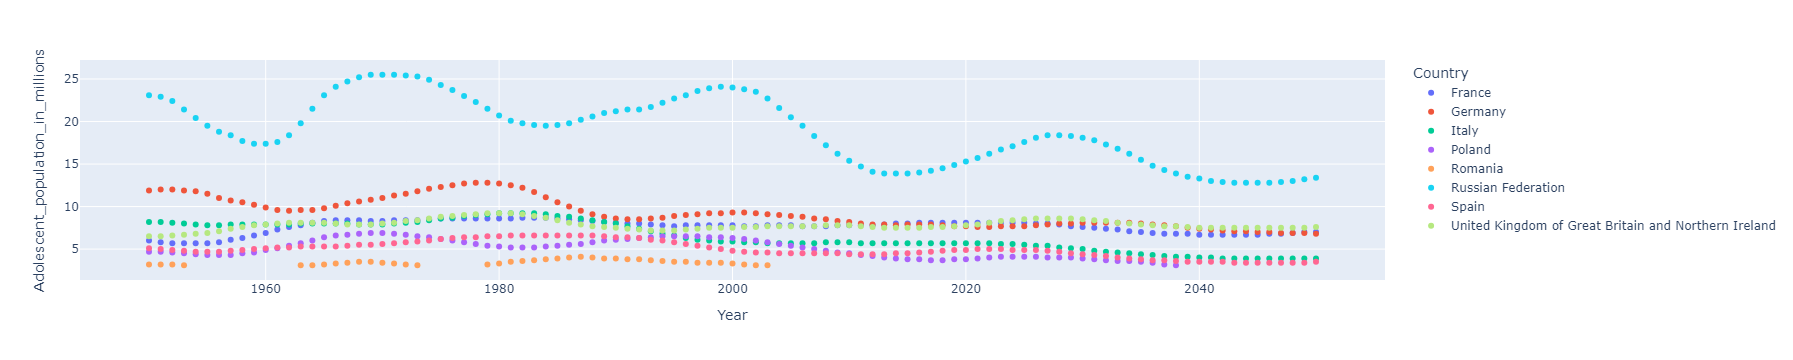

In [27]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Visual Python: Visualization > Plotly
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country')

# Filter the DataFrame for > 2 Million adolescents and WHO region == Europe
df_filtered = df[(df['Adolescent_population_in_millions'] > 2) & 
                (df['World_bank_income_group'] == 'High income') & 
                (df['WHO_region']=='Europe')]

# Create the scatter plot with the filtered DataFrame
fig = px.scatter(df_filtered, x='Year', y='Adolescent_population_in_millions', color='Country')
fig.show()

In [86]:
from dash import Dash, html, dcc, Input, Output, callback
import pandas as pd
import plotly.express as px

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = Dash(__name__, external_stylesheets=external_stylesheets)

df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')


app.layout = html.Div([
    html.Div([

        html.Div([
            dcc.Dropdown(
                df['WHO region'].unique(),
                'Europe',
                id='crossfilter-xaxis-column',
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-xaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ],
        style={'width': '49%', 'display': 'inline-block'}),

        html.Div([
            dcc.Dropdown(
                df['World bank income group'].unique(),
                'High income',
                id='crossfilter-yaxis-column'
            ),
            dcc.RadioItems(
                ['Linear', 'Log'],
                'Linear',
                id='crossfilter-yaxis-type',
                labelStyle={'display': 'inline-block', 'marginTop': '5px'}
            )
        ], style={'width': '49%', 'float': 'right', 'display': 'inline-block'})
    ], style={
        'padding': '10px 5px'
    }),

    html.Div([
        dcc.Graph(
            id='crossfilter-indicator-scatter',
            hoverData={'points': [{'customdata': 'Japan'}]}
        )
    ], style={'width': '49%', 'display': 'inline-block', 'padding': '0 20'}),
    html.Div([
        dcc.Graph(id='x-time-series'),
        dcc.Graph(id='y-time-series'),
    ], style={'display': 'inline-block', 'width': '49%'}),

    html.Div(dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=None,
        id='crossfilter-year--slider',
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()}
    ), style={'width': '49%', 'padding': '0px 20px 20px 20px'})
])


@callback(
    Output('crossfilter-indicator-scatter', 'figure'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'),
    Input('crossfilter-yaxis-type', 'value'),
    Input('crossfilter-year--slider', 'value'))
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    fig = px.scatter(x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            hover_name=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name']
            )

    fig.update_traces(customdata=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'])

    fig.update_xaxes(title=xaxis_column_name, type='linear' if xaxis_type == 'Linear' else 'log')

    fig.update_yaxes(title=yaxis_column_name, type='linear' if yaxis_type == 'Linear' else 'log')

    fig.update_layout(margin={'l': 40, 'b': 40, 't': 10, 'r': 0}, hovermode='closest')

    return fig


def create_time_series(dff, axis_type, title):

    fig = px.scatter(dff, x='Year', y='Value')

    fig.update_traces(mode='lines+markers')

    fig.update_xaxes(showgrid=False)

    fig.update_yaxes(type='linear' if axis_type == 'Linear' else 'log')

    fig.add_annotation(x=0, y=0.85, xanchor='left', yanchor='bottom',
                       xref='paper', yref='paper', showarrow=False, align='left',
                       text=title)

    fig.update_layout(height=225, margin={'l': 20, 'b': 30, 'r': 10, 't': 10})

    return fig


@callback(
    Output('x-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-xaxis-column', 'value'),
    Input('crossfilter-xaxis-type', 'value'))
def update_x_timeseries(hoverData, xaxis_column_name, axis_type):
    country_name = hoverData['points'][0]['customdata']
    dff = df[df['Country Name'] == country_name]
    dff = dff[dff['Indicator Name'] == xaxis_column_name]
    title = '<b>{}</b><br>{}'.format(country_name, xaxis_column_name)
    return create_time_series(dff, axis_type, title)


@callback(
    Output('y-time-series', 'figure'),
    Input('crossfilter-indicator-scatter', 'hoverData'),
    Input('crossfilter-yaxis-column', 'value'),
    Input('crossfilter-yaxis-type', 'value'))
def update_y_timeseries(hoverData, yaxis_column_name, axis_type):
    dff = df[df['Country Name'] == hoverData['points'][0]['customdata']]
    dff = dff[dff['Indicator Name'] == yaxis_column_name]
    return create_time_series(dff, axis_type, yaxis_column_name)


if __name__ == '__main__':
    app.run(debug=True, port=8051)

---------------------------------------------------------------------------
KeyError                                  Traceback (most recent call last)
File ~\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\pandas\core\indexes\base.py:3805, in Index.get_loc(
    self=Index(['Year', 'Country ISO 3 code', 'Country', ...previous year in percent'],
      dtype='object'),
    key='Country Name'
)
   3804 try:
-> 3805     return self._engine.get_loc(casted_key)
        casted_key = 'Country Name'
        self = Index(['Year', 'Country ISO 3 code', 'Country', 'WHO region',
       'World bank income group', 'Adolescent population in millions',
       'change from previous year in percent'],
      dtype='object')
   3806 except KeyError as err:

File index.pyx:167, in pandas._libs.index.IndexEngine.get_loc()

File index.pyx:196, in pandas._libs.index.IndexEngine.get_loc()

File pandas\\_libs\\hashtable_class_helper.pxi:7081, in pandas._libs.hashtable.PyObjectHashTable.get_item(

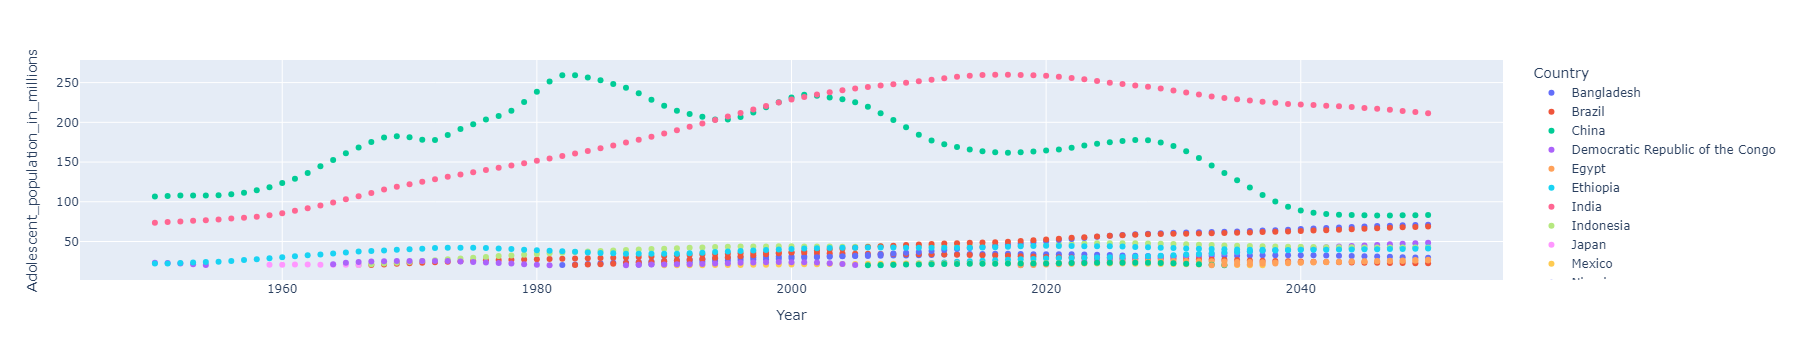

In [28]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Visual Python: Visualization > Plotly
fig = px.scatter(df, x='Year', y='Adolescent_population_in_millions', color='Country')

# Filter the DataFrame for High income
df_filtered = df[(df['Adolescent_population_in_millions'] > 20)]

# Create the scatter plot with the filtered DataFrame
fig = px.scatter(df_filtered, x='Year', y='Adolescent_population_in_millions', color='Country')
fig.show()

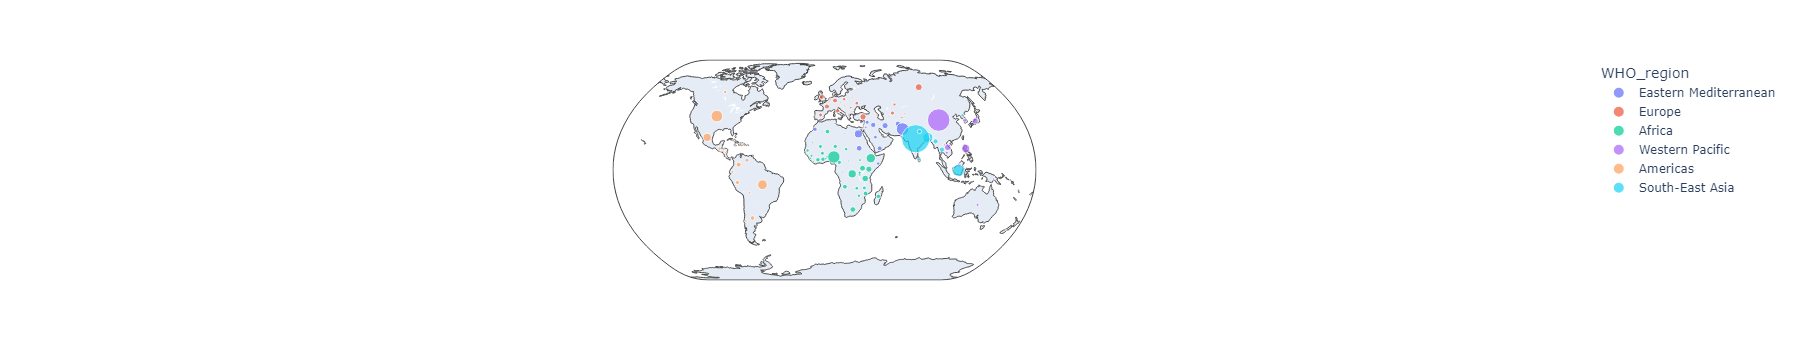

In [339]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
import pandas as pd

df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv').query("Year==2020")

fig = px.scatter_geo(df, locations="Country_ISO_3_code", color="WHO_region",
                     hover_name="Country", size="Adolescent_population_in_millions",
                     projection="natural earth")

fig.show()


In [7]:
from dash import Dash, dcc, html, Input, Output, callback
import plotly.express as px
import pandas as pd

df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df['Year'].min(),
        df['Year'].max(),
        step=5,
        value=df['Year'].min(),
        marks={str(year): str(year) for year in range(df['Year'].min(), df['Year'].max()+1, 5)},
        id='year-slider'
    )
])

@callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))
def update_figure(selected_year):
    filtered_df = df[df.Year == selected_year]

    fig = px.scatter_geo(filtered_df, locations="Country_ISO_3_code", color="WHO_region",
                     hover_name="Country", size="Adolescent_population_in_millions",
                     projection="natural earth")

    fig.update_layout(transition_duration=100)

    fig.update_layout(title_x=0.5, width=1200, height=800)

    return fig

if __name__ == '__main__':
    app.run(debug=True, port=8060)


            countries                 WBIC  adol_population_in_2020
70        Afghanistan           Low income                      9.6
171           Albania  Upper middle income                      0.4
272           Algeria  Upper middle income                      6.9
373    American Samoa          High income                      0.0
474           Andorra          High income                      0.0
...               ...                  ...                      ...
23199         Vanuatu  Lower middle income                      0.1
23401        Viet Nam  Lower middle income                     14.1
23704           Yemen           Low income                      8.1
23805          Zambia  Lower middle income                      4.6
23906        Zimbabwe  Lower middle income                      3.8

[216 rows x 3 columns]


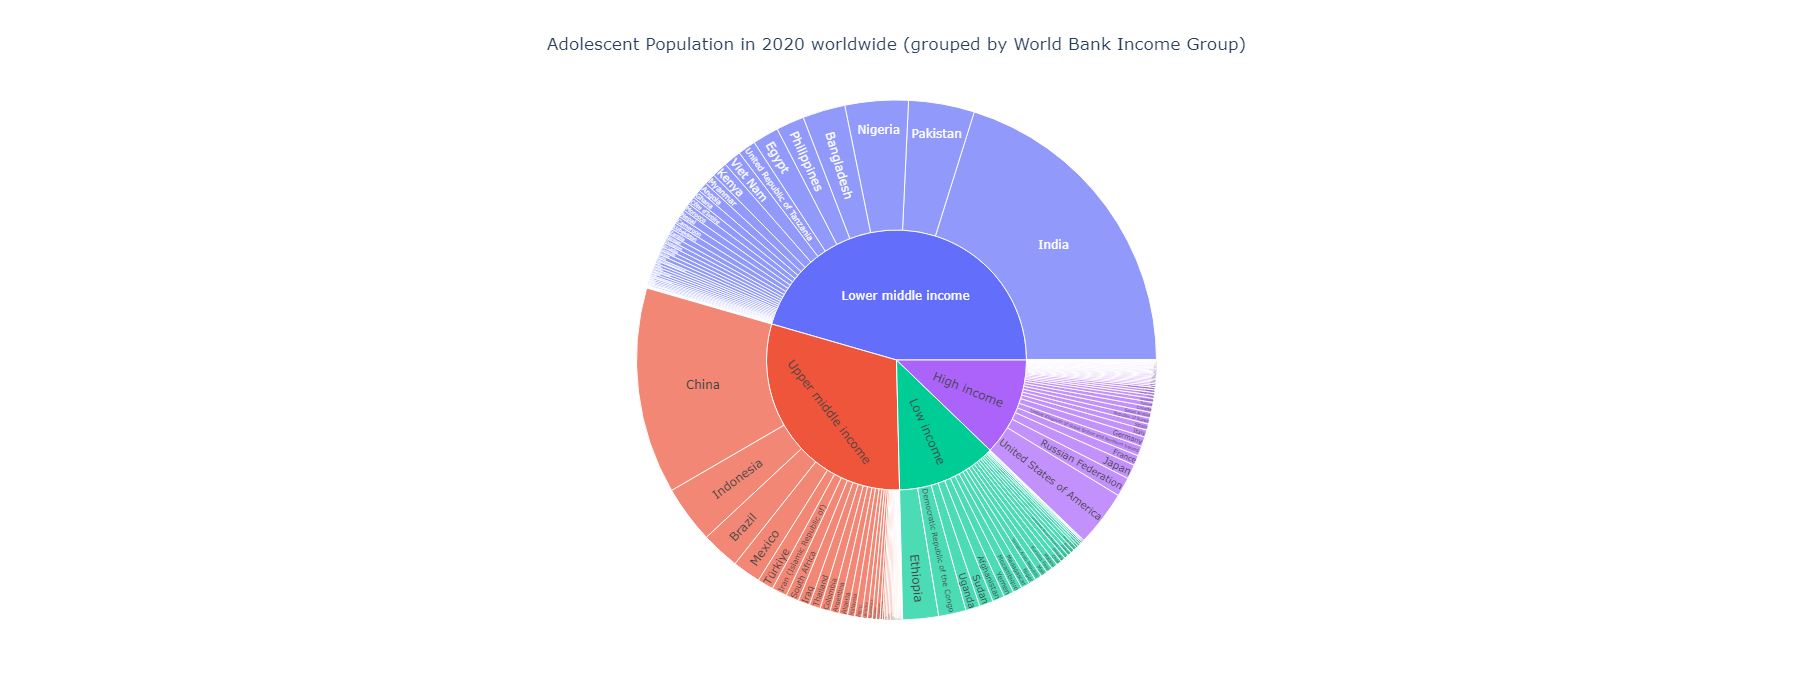

In [8]:
#Adolescent Population in 2020 worldwide (grouped by World Bank Income Group)#

import plotly.express as px
import pandas as pd

# Load the data into a DataFrame
df_sb = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv').query("Year == 2020")

# Clean the data by removing rows with missing values in 'WBIC'
df_sb_clean = df_sb.dropna(subset=['World_bank_income_group'])

# Extract relevant columns
countries = df_sb_clean.Country
WBIC = df_sb_clean.World_bank_income_group
adol_population_in_2020 = df_sb_clean.Adolescent_population_in_millions

# Create a new DataFrame with the cleaned data
df_sb_clean = pd.DataFrame({
    'countries': countries,
    'WBIC': WBIC,
    'adol_population_in_2020': adol_population_in_2020
})

# Print the cleaned DataFrame
print(df_sb_clean)

# Create the sunburst plot
fig = px.sunburst(df_sb_clean, path=['WBIC', 'countries'], values='adol_population_in_2020', 
                  title="Adolescent Population in 2020 worldwide (grouped by World Bank Income Group)")

fig.update_layout(title_x=0.5, width=800, height=700)

fig.show()

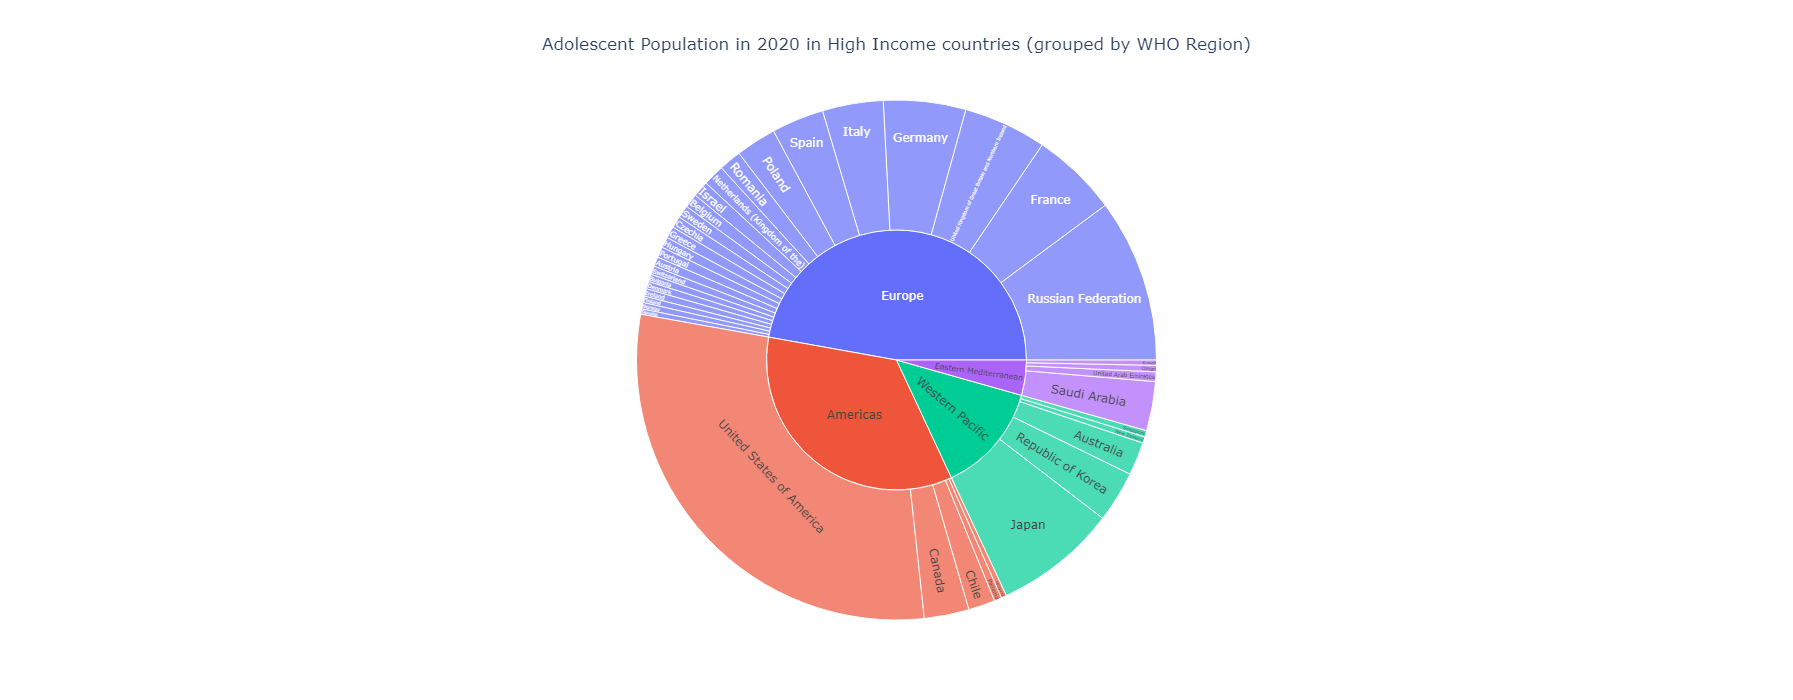

In [48]:
#Adolescent Population in 2020 in High Income countries (grouped by WHO region)#

import plotly.express as px
import pandas as pd

# Load the data into a DataFrame
df_sb = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv').query("Year == 2020")

# Clean the data by removing rows with missing values in 'WBIC'
df_sb_clean = df_sb.dropna(subset=['World_bank_income_group', 'WHO_region'])

# Filter data for "High income" countries
df_sb_high_income = df_sb_clean[(df_sb_clean['World_bank_income_group'] == 'High income') &
                    (df_sb_clean['Adolescent_population_in_millions'] >= 0.5)]

# Extract relevant columns
countries = df_sb_high_income.Country
WHO_region = df_sb_high_income.WHO_region
adol_population_in_2020 = df_sb_high_income.Adolescent_population_in_millions

# Create a new DataFrame with the cleaned data
df_sb_high_income = pd.DataFrame({
    'Countries': countries,
    'WHO Region': WHO_region,
    'Adolescent population in 2020': adol_population_in_2020
})

# Create the sunburst plot
fig = px.sunburst(df_sb_high_income, path=['WHO Region', 'Countries'], values='Adolescent population in 2020', 
                  title="Adolescent Population in 2020 in High Income countries (grouped by WHO Region)")

fig.update_layout(title_x=0.5, width=800, height=700)

fig.show()

In [4]:
#Adolescent Population in High Income countries with > than 0.5 million adolescents (grouped by WHO Region)
import plotly.express as px
import pandas as pd
from dash import Dash, dcc, html, Input, Output, callback

df_sb = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df_sb['Year'].min(),
        df_sb['Year'].max(),
        step=None,
        value=df_sb['Year'].min(),
        marks={str(Year): str(Year) for Year in df_sb['Year'].unique()},
        id='year-slider'
    ),
    html.H2(id='year-title', children=f"Selected Year: {df_sb['Year'].min()}")
])

@callback(
    Output('graph-with-slider', 'figure'),
    Output('year-title', 'children'),
    Input('year-slider', 'value'))

def update_figure(selected_year):
    # Clean the data by removing rows with missing values in 'World_bank_income_group', 'WHO_region'
    df_sb_clean = df_sb.dropna(subset=['World_bank_income_group', 'WHO_region'])

    # Filter data for "High income" countries
    df_sb_high_income = df_sb_clean[(df_sb_clean['World_bank_income_group'] == 'High income') &
                    (df_sb_clean['Adolescent_population_in_millions'] >= 0.5)]

    #select the correct year
    filtered_df = df_sb_high_income[df_sb_high_income.Year == selected_year]

    # Extract relevant columns
    countries = filtered_df.Country
    WHO_region = filtered_df.WHO_region
    adol_population = filtered_df.Adolescent_population_in_millions

    # Create a new DataFrame with the cleaned data
    filtered_df = pd.DataFrame({
        'Countries': countries,
        'WHO Region': WHO_region,
        'Adolescent population': adol_population
    })

    # Create the sunburst plot
    fig = px.sunburst(filtered_df, path=['WHO Region', 'Countries'], values='Adolescent population', 
                  title="Adolescent Population in High Income countries with > than 0.5 million adolescents (grouped by WHO Region)")

    fig.update_layout(title_x=0.5, width=1000, height=700)

    return fig, f"Selected Year: {selected_year}"

if __name__ == '__main__':
    app.run(debug=True, port=8061)

In [2]:
#Adolescent Population worldwide (grouped by WHO Region & World Bank Income Group) larger than 0.5 million

import plotly.express as px
import pandas as pd
from dash import Dash, dcc, html, Input, Output, callback

df_sb = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')

# Define fixed colors for WHO_region and World_bank_income_group
unique_who_regions = df_sb['WHO_region'].dropna().unique()
unique_income_groups = df_sb['World_bank_income_group'].dropna().unique()

color_map = {
    **{region: f"rgba({i*50 % 255}, {100 + i*30 % 155}, {200 - i*20 % 100}, 1)" for i, region in enumerate(unique_who_regions)},
    **{group: f"rgba({150 + i*20 % 100}, {50 + i*40 % 155}, {250 - i*60 % 200}, 1)" for i, group in enumerate(unique_income_groups)},
}

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        df_sb['Year'].min(),
        df_sb['Year'].max(),
        step=None,
        value=df_sb['Year'].min(),
        marks={str(Year): str(Year) for Year in df_sb['Year'].unique()},
        id='year-slider'
    ),
    html.H2(id='year-title', children=f"Selected Year: {df_sb['Year'].min()}")
])

@callback(
    Output('graph-with-slider', 'figure'),
    Output('year-title', 'children'),
    Input('year-slider', 'value'))


def update_figure(selected_year):
    df_sb_clean = df_sb.dropna(subset=['World_bank_income_group', 'WHO_region'])

    filtered_df_1 = df_sb_clean[df_sb_clean.Year == selected_year]
    filtered_df = filtered_df_1[filtered_df_1.Adolescent_population_in_millions >= 0.5]

    countries = filtered_df.Country
    WBIC = filtered_df.World_bank_income_group
    adol_population = filtered_df.Adolescent_population_in_millions
    WHO_region = filtered_df.WHO_region

    filtered_df = pd.DataFrame({
        'Countries': countries,
        'World Bank Income Group': WBIC,
        'Adolescent Population': adol_population,
        'WHO Region': WHO_region
    })

    fig = px.sunburst(filtered_df, path=['WHO Region', 'World Bank Income Group', 'Countries'], values='Adolescent Population', 
                  title="Adolescent Population worldwide (grouped by WHO Region & World Bank Income Group) > 0.5 million",         
                      color='WHO Region',  # Set the color dimension
                      color_discrete_map=color_map  # Apply the fixed color map
                     )
    fig.update_layout(title_x=0.5, width=1200, height=800)

    return fig, f"Selected Year: {selected_year}"

if __name__ == '__main__':
    app.run(debug=True, port=8069)

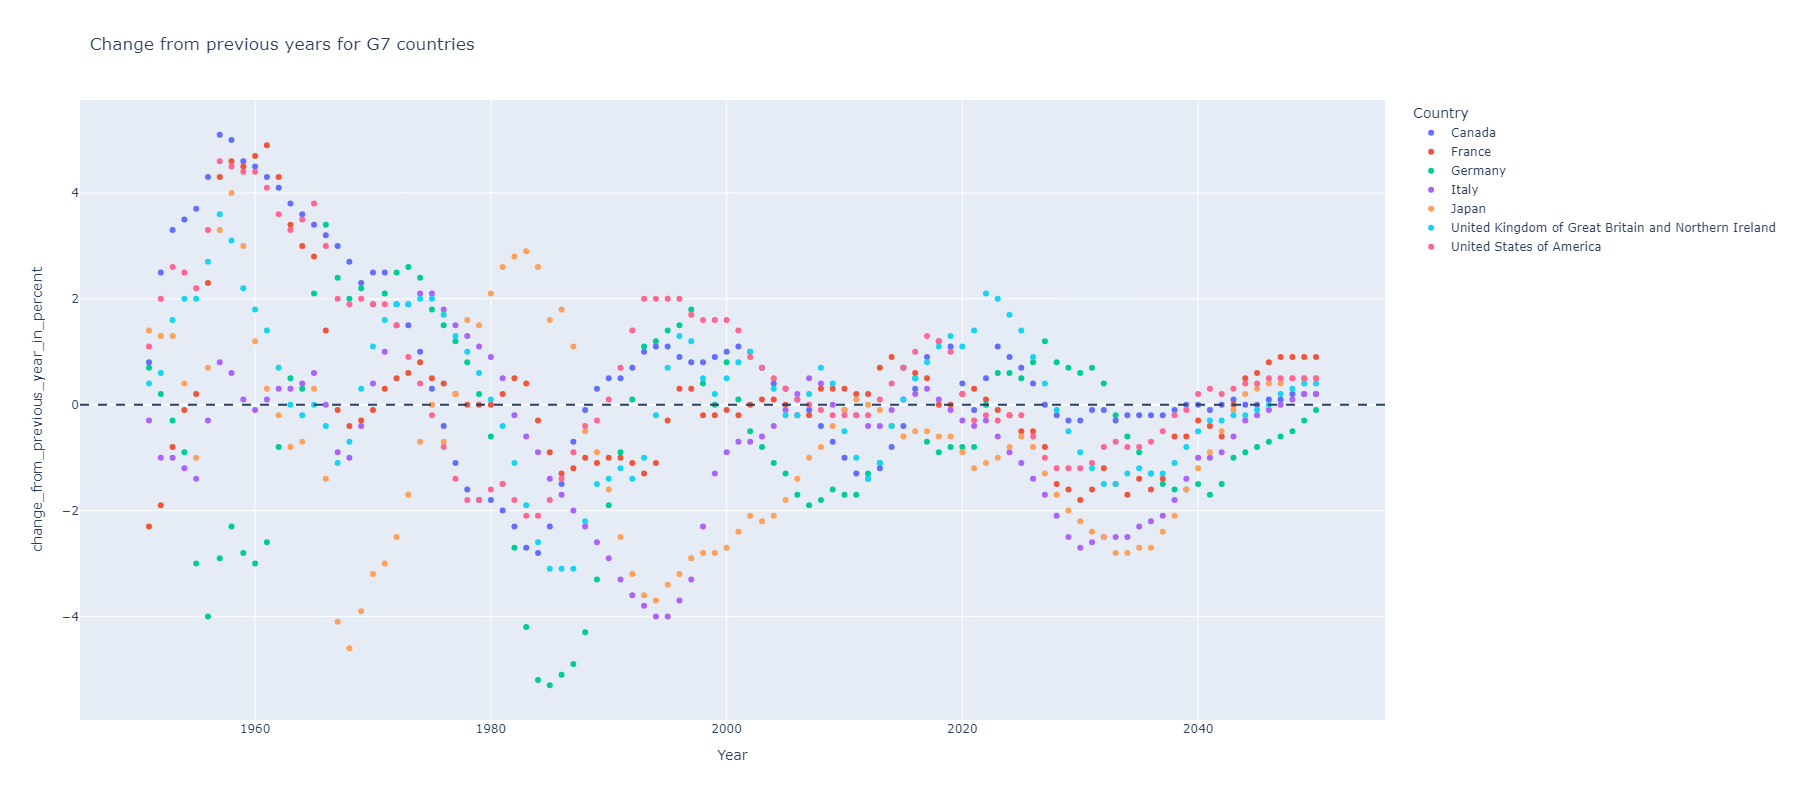

In [46]:
#Change from previous years for G7 countries
# Visual Python: Visualization > Plotly

import pandas as pd
import plotly.express as px

df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')

G7_countries = ['Canada','France','Germany','Italy','Japan',
                'United Kingdom of Great Britain and Northern Ireland','United States of America']

df_filtered_change = df[(df["Country"].isin(G7_countries)) & (df["Year"] >= 1951) & (df["Year"] <= 2050)].copy()
df_filtered_change['change_from_previous_year_in_percent'] = pd.to_numeric(df_filtered_change
                                                                    ['change_from_previous_year_in_percent'], 
                                                                    errors='coerce')

fig = px.scatter(df_filtered_change, x='Year', y='change_from_previous_year_in_percent', color='Country', 
                 title="Change from previous years for G7 countries")
fig.add_hline(y=0, line_dash="dash")

fig.update_layout(width=1500, height=800)

fig.show()

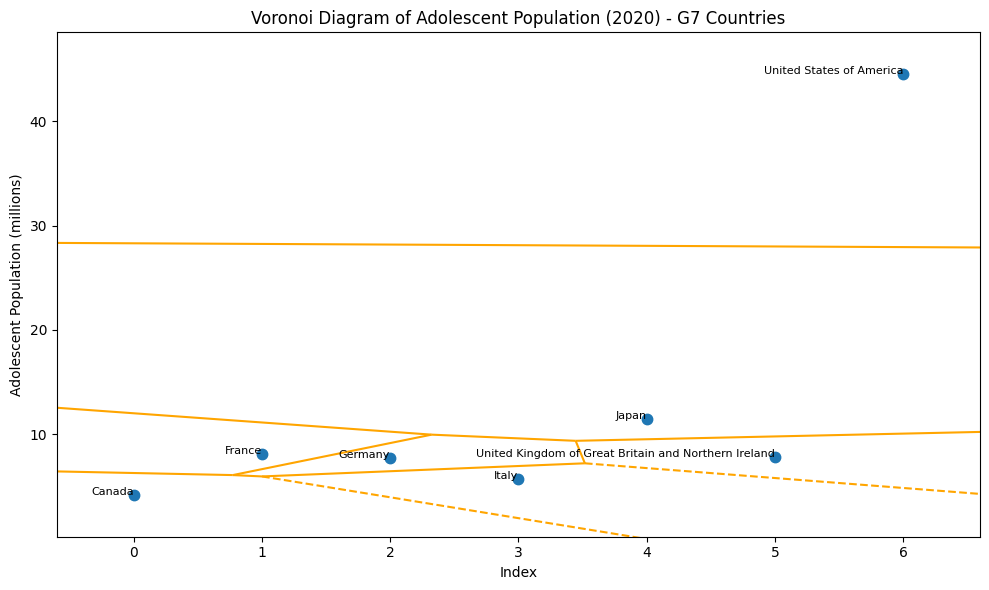

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load the dataset
df = pd.read_csv('./daten/WHO_adolescent_pop_1950_2050_age_10_19_both_sexes.csv')

# Define G7 countries
G7_countries = ['Canada', 'France', 'Germany', 'Italy', 'Japan',
                'United Kingdom of Great Britain and Northern Ireland', 'United States of America']

# Filter data for the year 2020 and G7 countries
df_g7_2020 = df[(df['Year'] == 2020) & (df['Country'].isin(G7_countries))]

# Use relevant columns
# Create coordinates for Voronoi
x_coords = np.arange(len(df_g7_2020))  # Sequential indices for X-axis
y_coords = df_g7_2020['Adolescent_population_in_millions'].values

# Combine into 2D points
points = np.column_stack((x_coords, y_coords))

# Generate the Voronoi diagram
vor = Voronoi(points)

# Plot the Voronoi diagram
fig, ax = plt.subplots(figsize=(10, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1.5, point_size=15)

# Annotate points with their labels
for i, (x, y) in enumerate(points):
    plt.text(x, y, df_g7_2020.iloc[i]['Country'], fontsize=8, ha='right')

# Add labels and title
plt.title("Voronoi Diagram of Adolescent Population (2020) - G7 Countries")
plt.xlabel("Index")
plt.ylabel("Adolescent Population (millions)")
plt.tight_layout()
plt.show()

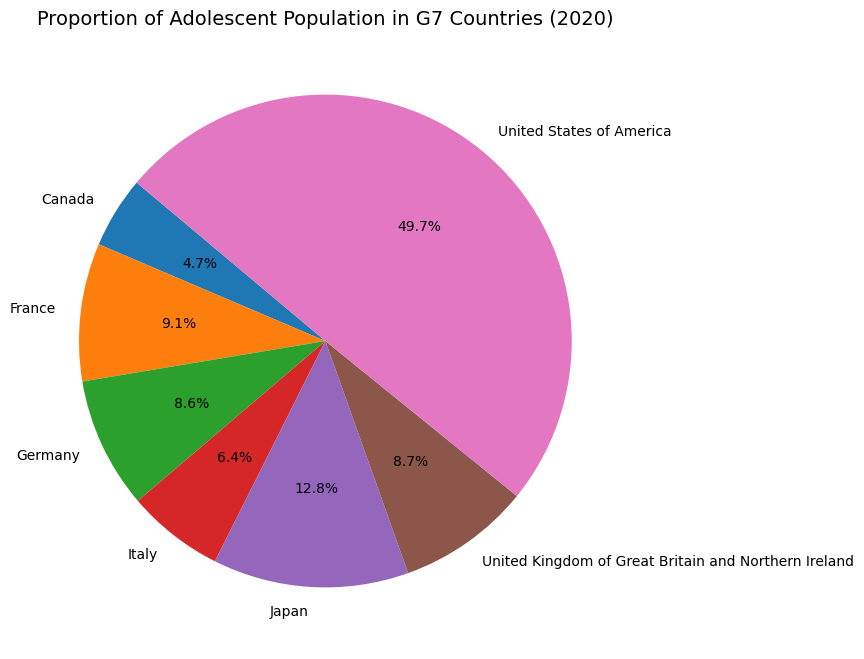

In [12]:
import matplotlib.pyplot as plt

# Extract data for the pie chart
countries = df_g7_2020['Country']
populations = df_g7_2020['Adolescent_population_in_millions']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(populations, labels=countries, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)

# Add a title
plt.title("Proportion of Adolescent Population in G7 Countries (2020)", fontsize=14)

# Show the plot
plt.show()